## Unsupervised Learning in Python

### NOTE: The following link shown in the first part of this course is wrong:
https://scikitlearn.org/stable/modules/generated/sklearn.datasets.load_iris.html

### This is the safe place to get the iris data set
https://archive.ics.uci.edu/dataset/53/iris

This notebook is about implementation in Python/sklearn. It assumes prior knowledge of the theory behind each analysis.

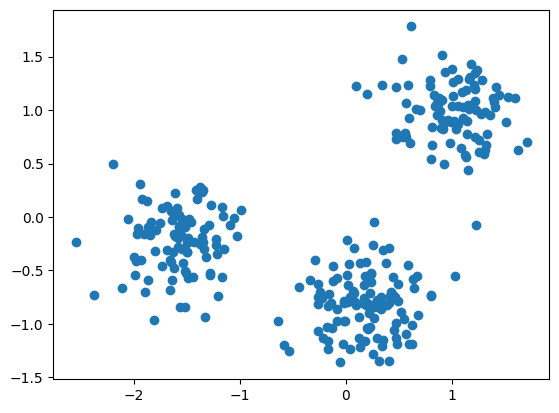

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

points = np.loadtxt('./data/points01.txt', delimiter=',')
xs = points[:, 0]
ys = points[:, 1]
plt.scatter(xs, ys)

In [2]:
new_points = np.loadtxt('./data/points02.txt', delimiter=',')

# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)

# Fit model to points
model.fit(points)

# Determine the cluster labels of new_points: labels
labels = model.predict(new_points)

# Print cluster labels of new_points
print(labels)

[0 1 2 0 1 0 1 1 1 2 0 1 1 2 2 1 2 2 1 1 2 1 0 1 0 2 1 2 2 0 0 1 1 1 2 0 1
 1 0 1 2 0 0 2 0 1 2 2 1 1 1 1 2 2 0 0 2 2 2 0 0 1 1 1 0 1 2 1 0 2 0 0 0 1
 0 2 2 0 1 2 0 2 0 1 2 1 2 0 1 1 1 0 1 1 0 2 2 2 2 0 1 0 2 2 0 0 1 0 2 2 0
 2 2 2 1 1 1 1 2 2 1 0 1 2 1 0 2 1 2 2 1 2 1 2 0 1 0 0 1 2 0 1 0 0 2 1 1 0
 2 0 2 1 0 2 2 0 2 1 1 2 1 2 2 1 1 0 1 1 2 0 2 0 0 1 0 1 1 0 0 2 0 0 0 2 1
 1 0 2 0 2 2 1 1 1 0 1 1 1 2 2 0 1 0 0 0 2 1 1 1 1 1 1 2 2 1 2 2 2 2 1 2 2
 1 1 0 2 0 0 2 0 2 0 2 1 1 2 1 1 1 2 0 0 2 1 1 2 1 2 2 1 2 2 0 2 0 0 0 1 2
 2 2 0 1 0 2 0 2 2 1 0 0 0 2 1 1 1 0 1 2 2 1 0 0 2 0 0 2 0 1 0 2 2 2 2 1 2
 2 1 1 0]


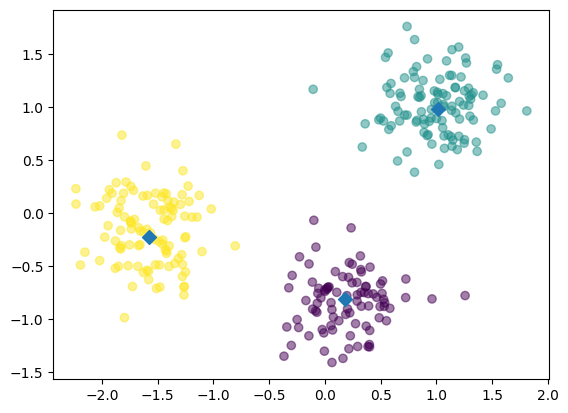

In [3]:
# Assign the columns of new_points: xs and ys
xs = new_points[:, 0]
ys = new_points[:, 1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs, ys, c=labels, alpha=0.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker='D', s=50)
plt.show()

## How many clusters of grain?

A good number of clusters for a dataset using the k-means inertia graph is in the "elbow" of the cureve. Let's say that we are given an array samples containing the measurements (such as area, perimeter, length, and several others) of samples of grain. What's a good number of clusters in this case?

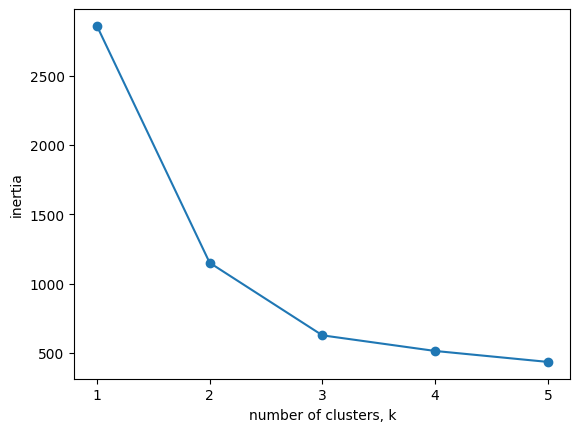

In [4]:
samples = np.loadtxt('./data/seeds.csv', delimiter=',')
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

## Evaluating the grain clustering

From the inertia plot above, 3 looks like a good number of clusters for the grain data. In fact, the grain samples come from a mix of 3 different grain varieties: "Kama", "Rosa" and "Canadian". Let's look at clustering the grain samples into three clusters, and comparing those clusters to the grain varieties using a cross-tabulation.

In [5]:
varieties = pd.read_csv('./data/seed_varieties.txt', header=None, names=['variety'])
varieties = list(varieties['variety'])

In [6]:
# KMeans model with 3 clusters
model = KMeans(n_clusters=3)

# fit model and obtain cluster labels: labels
labels = model.fit_predict(samples)  # like running .fit() followed by .predict()

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)

varieties  'Canadian wheat'  'Kama wheat'  'Rosa wheat'
labels                                                 
0                         0            64            10
1                        70             5             0
2                         0             1            60


## Piedmont wines dataset
 
+ 178 samples from 3 distinct varieties of red wine: Barolo, Grignolino and Barbera
+ Features measure chemical composition e.g. alcohol content
+ Visual properties like "color intensity"



In [7]:
wine_data = pd.read_csv('./data/wine.csv')
wine_data.head()

,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1,Barolo,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,Barolo,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,Barolo,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,Barolo,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,Barolo,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [8]:
wine_no_labels = wine_data.iloc[:, 2:]
wine_labels = wine_data.loc[:, ['class_name']]
wine_no_labels.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [9]:
model_wine = KMeans(n_clusters=3)
labels = model.fit_predict(wine_no_labels)
varieties = wine_labels['class_name'].values
df = pd.DataFrame({
    'labels': labels,
    'varieties': varieties
})

ct = pd.crosstab(df['labels'], df['varieties'])
print(ct)  # poor separation

varieties  Barbera  Barolo  Grignolino
labels                                
0               29      13          20
1                0      46           1
2               19       0          50


## Feature variances

+ The wine features have very different variances
+ Can use `StandardScalar` to transform features to have mean = 0, and variance = 1 (standardize)
+ Feature standardization improves clustering



In [10]:
# use pipeline to combine multiple steps
scaler = StandardScaler()
kmeans = KMeans(n_clusters=3)
pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(wine_no_labels)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=3))])

In [11]:
labels_std = pipeline.predict(wine_no_labels)
ct_std = pd.crosstab(labels_std, df['varieties'])
print(ct_std)  # much better separation!

varieties  Barbera  Barolo  Grignolino
row_0                                 
0                0      59           3
1               48       0           3
2                0       0          65


## Scaling fish data for clustering

We are given an array samples giving measurements of fish. Each row represents an individual fish. The measurements, such as weight in grams, length in centimeters, and the percentage ratio of height to length, have very different scales. In order to cluster this data effectively, we'll need to standardize these features first. Here, we'll build a pipeline to standardize and cluster the data.

These fish measurement data were sourced from the [Journal of Statistics Education](http://ww2.amstat.org/publications/jse/jse_data_archive.htm).

In [13]:
fish_data = pd.read_csv('./data/fish.csv', header=None)
fish_data.head()

,0,1,2,3,4,5,6
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1


In [18]:
fish_samples = fish_data.iloc[:, 1:].values
fish_species = fish_data.iloc[:, 0]

In [16]:
# Create scaler
scaler = StandardScaler()

# Create KMeans instance
kmeans = KMeans(n_clusters=4)

# Create pipeline
pipeline = make_pipeline(scaler, kmeans)

In [19]:
# Fit the pipeline to samples
pipeline.fit(fish_samples)

# Calculate the cluster labels: labels
labels = pipeline.predict(fish_samples)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({
    'labels': labels,
    'species': fish_species
})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['species'])

# Display ct
print(ct)

species  Bream  Pike  Roach  Smelt
labels                            
0            1     0     19      1
1            0    17      0      0
2            0     0      0     13
3           33     0      1      0


## Clustering stocks using KMeans

We'll now cluster companies using their daily stock price movements (i.e. the dollar difference between the closing and opening prices for each trading day). We are given a NumPy array of daily price movements from 2010 to 2015 (obtained from Yahoo! Finance), where each row corresponds to a company, and each column corresponds to a trading day.

Some stocks are more expensive than others. To account for this, we'll include a `Normalizer` at the beginning of our pipeline. The `Normalizer` will separately transform each company's stock price to a relative scale before the clustering begins.

Note that `Normalizer()` is different to `StandardScaler()`, which we used earlier. While `StandardScaler()` standardizes features (such as the features of the fish data) by removing the mean and scaling to unit variance, `Normalizer()` rescales each sample - here, each company's stock price - independently of the other. 

In [21]:
# to do: deal with data layout...
stock_data = pd.read_csv('./data/company-stock-movements-2010-2015-incl.csv', header=None)
stock_data.head()

,0,1,2,3,4,5,6,7,8,9,...,954,955,956,957,958,959,960,961,962,963
0,NaN,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
1,Apple,0.5799999999999841,-0.22000499999998624,-3.4099980000000016,-1.1699999999999875,1.680010999999979,-2.6899940000000413,-1.4699939999999856,2.7799970000000087,-0.6800029999999708,...,0.320007999999973,4.519996999999989,2.89998700000001,9.59001900000004,-6.540016000000037,5.959975999999983,6.910011000000054,-5.359961999999996,0.8400189999999839,-19.589980999999966
2,AIG,-0.6400020000000026,-0.6500000000000021,-0.21000100000000188,-0.4200000000000017,0.7100010000000019,-0.20000100000000032,-1.130001,0.06999899999999926,-0.11999899999999641,...,0.9199979999999925,0.7099990000000034,0.11999899999999997,-0.4799999999999969,0.010002000000007172,-0.279997999999992,-0.19000300000000436,-0.04000099999999662,-0.40000200000000063,0.6599999999999966
3,Amazon,-2.3500060000000076,1.2600089999999966,-2.3500060000000076,-2.0099950000000035,2.960005999999993,-2.3099969999999814,-1.640006999999997,1.2099990000000105,-1.7900009999999895,...,2.1099849999999947,3.699982000000034,9.57000800000003,-3.4500130000000127,4.82000800000003,-4.079985999999963,2.5799860000000194,4.790008999999998,-1.7600089999999682,3.740021000000013
4,American express,0.1099969999999999,0.0,0.26000200000000717,0.7200020000000009,0.19000300000000436,-0.2700010000000006,0.75,0.30000400000000127,0.639998999999996,...,0.6800009999999901,2.2900009999999895,0.4099960000000067,-0.0699989999999957,0.10000599999999338,0.06999900000000991,0.13000499999999704,1.8499989999999968,0.04000100000000373,0.5400010000000037


In [ ]:
# Import Normalizer
from sklearn.preprocessing import Normalizer

# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer, kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)

In [ ]:
# Predict the cluster labels: labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values(['labels']))